In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
acquisitions_df = pd.read_csv("acquisitions_final.csv").drop('Unnamed: 0', axis = 1).dropna()

In [48]:
rounds_df = pd.read_csv("rounds.csv", encoding = 'ISO-8859-1').drop('Unnamed: 16', axis = 1).dropna()
rounds_df.rename(columns = lambda x: x.strip(), inplace = True)

In [50]:
rounds_df['raised_amount_usd'] = rounds_df['raised_amount_usd'].apply(lambda x: x.replace(',', '').strip())
rounds_df['raised_amount_usd'] = rounds_df['raised_amount_usd'].astype(int)

In [55]:
test_df = rounds_df.groupby(['company_name']).agg({'raised_amount_usd': 'sum'}).reset_index()

In [124]:
final_df = acquisitions_df.merge(test_df, left_on='company_name', right_on='company_name')

In [125]:
final_df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,...,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code,raised_amount_usd
0,/organization/170-systems,170 Systems,|Software|,Software,USA,MA,Boston,Bedford,/organization/kofax,Kofax,...,CA,Anaheim,Irvine,2009-09-08,2009-09,2009-Q3,2009.0,43000000,USD,14000000
1,/organization/41st-parameter,41st Parameter,|Security|,Security,USA,CA,SF Bay Area,San Jose,/organization/experian,Experian,...,CA,Anaheim,Costa Mesa,2013-10-01,2013-10,2013-Q4,2013.0,324000000,USD,34270000
2,/organization/5min,5min Media,|Education|Video|Games|,Video,USA,NY,New York City,New York,/organization/aol,AOL,...,NY,New York City,New York,2010-09-28,2010-09,2010-Q3,2010.0,65000000,USD,12500000
3,/organization/aardvark,Aardvark,|Search|,Search,USA,CA,SF Bay Area,San Francisco,/organization/google,Google,...,CA,SF Bay Area,Mountain View,2010-02-11,2010-02,2010-Q1,2010.0,50000000,USD,5250000
4,/organization/accertify,Accertify,|Fraud Detection|Credit Cards|Security|,Security,USA,IL,Chicago,Itasca,/organization/americanexpress,American Express,...,NY,New York City,New York,2010-11-01,2010-11,2010-Q4,2010.0,150000000,USD,6431124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,/organization/zappos,Zappos,|Curated Web|,Curated Web,USA,NV,Las Vegas,Las Vegas,/organization/amazon,Amazon,...,WA,Seattle,Seattle,2009-07-22,2009-07,2009-Q3,2009.0,1200000000,USD,62750000
492,/organization/zep-solar,Zep Solar,|Renewable Energies|Solar|Clean Technology|,Clean Technology,USA,CA,SF Bay Area,San Rafael,/organization/solarcity,SolarCity,...,CA,SF Bay Area,San Mateo,2013-10-09,2013-10,2013-Q4,2013.0,158000000,USD,10571182
493,/organization/zimbra,Zimbra,|Collaboration|Productivity Software|Web Devel...,Productivity Software,USA,CA,SF Bay Area,Palo Alto,/organization/yahoo,Yahoo!,...,CA,SF Bay Area,Sunnyvale,2007-09-01,2007-09,2007-Q3,2007.0,350000000,USD,14500000
494,/organization/ziplist,ZipList,|Weddings|iPhone|Android|Productivity Software...,Cooking,USA,VA,"Washington, D.C.",Reston,/organization/condenast,Condé Nast,...,NY,New York City,New York,2012-04-11,2012-04,2012-Q2,2012.0,14000000,USD,4500000


In [132]:
final_df.raised_amount_usd.describe()

count    4.960000e+02
mean     2.847406e+07
std      3.185346e+07
min      5.000000e+04
25%      7.452391e+06
50%      1.797500e+07
75%      3.585000e+07
max      2.250000e+08
Name: raised_amount_usd, dtype: float64

In [139]:
final_df.price_amount.describe()

count    4.960000e+02
mean     2.985729e+08
std      9.566177e+08
min      4.500000e+05
25%      3.175000e+07
50%      1.115000e+08
75%      3.000000e+08
max      1.900000e+10
Name: price_amount, dtype: float64

In [144]:
plot_df = final_df[(final_df['raised_amount_usd'] >= 1e7) & (final_df['price_amount'] >= 3e7)
                  & (final_df['raised_amount_usd'] <= 1e8) & (final_df['price_amount'] <= 1e9)]

(-18500000.01517661, 1000000000.0)

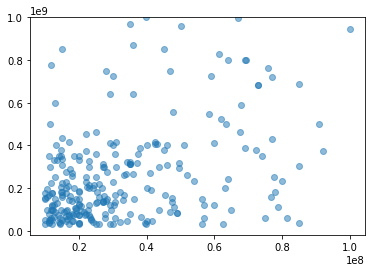

In [146]:
plt.scatter(plot_df.raised_amount_usd, plot_df.price_amount, alpha = 0.5)
plt.ylim(top = 1e9)

In [147]:
plot_df.to_csv('scatterplot.csv')